# Import libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from scripts.utility import load_dataset, calculate_pearson, calculate_spearman
from scripts.plot import plot_numeric_histograms, plot_time_series, plot_correlation_heatmap,plot_scatter_plots, plot_wind_analysis, plot_bubble_chart

# Read Dataset

In [2]:
df = load_dataset('sierraleone-bumbuna.csv')
df

Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb     RH   WS  \
0      2021-10-30 00:01:00 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.1  0.0   
1      2021-10-30 00:02:00 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.2  0.0   
2      2021-10-30 00:03:00 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.2  0.0   
3      2021-10-30 00:04:00 -0.7  0.0 -0.8   0.0   0.0  21.9   99.3  0.0   
4      2021-10-30 00:05:00 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.3  0.0   
...                    ...  ...  ...  ...   ...   ...   ...    ...  ...   
525595 2022-10-29 23:56:00 -1.6 -0.1 -2.9   0.0   0.0  24.0  100.0  0.0   
525596 2022-10-29 23:57:00 -1.7 -0.1 -3.0   0.0   0.0  24.0  100.0  0.0   
525597 2022-10-29 23:58:00 -1.7 -0.1 -3.1   0.0   0.0  24.0  100.0  0.0   
525598 2022-10-29 23:59:00 -1.7 -0.2 -3.3   0.0   0.0  23.9  100.0  0.0   
525599 2022-10-30 00:00:00 -1.7 -0.1 -3.4   0.0   0.0  23.9  100.0  0.0   

        WSgust  WSstdev   WD  WDstdev    BP  Cleaning  Precipitation  TModA  \
0          0.0      0.0  0.0      0.0  1002         0            0.0   22.3   
1          0.0      0.0  0.0      0.0  1002         0            0.0   22.3   
2          0.0      0.0  0.0      0.0  1002         0            0.0   22.3   
3          0.0      0.0  0.0      0.0  1002         0            0.1   22.3   
4          0.0      0.0  0.0      0.0  1002         0            0.0   22.3   
...        ...      ...  ...      ...   ...       ...            ...    ...   
525595     0.0      0.0  0.0      0.0   999         0            0.0   24.2   
525596     0.0      0.0  0.0      0.0   999         0            0.0   24.2   
525597     0.0      0.0  0.0      0.0  1000         0            0.0   24.1   
525598     0.0      0.0  0.0      0.0  1000         0            0.0   24.1   
525599     0.0      0.0  0.0      0.0  1000         0            0.0   24.1   

        TModB  Comments  
0        22.6       NaN  
1        22.6       NaN  
2        22.6       NaN  
3        22.6       NaN  
4        22.6       NaN  
...       ...       ...  
525595   24.5       NaN  
525596   24.5       NaN  
525597   24.4       NaN  
525598   24.4       NaN  
525599   24.4       NaN  

[525600 rows x 19 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cleaning       525600 non-null  int64         
 15  

### How many rows have values of zero overall 

In [4]:
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

for col in columns_to_check:
    total = len(df[col])
    zeros = (df[col] == 0).sum()
    percent_zeros = (zeros / total) * 100
    print(f"{col}: {percent_zeros:.2f}% zeros")

GHI: 0.12% zeros
DNI: 5.24% zeros
DHI: 0.07% zeros
ModA: 46.91% zeros
ModB: 46.98% zeros
WS: 33.39% zeros
WSgust: 31.66% zeros


# Pre-processing step

In [5]:
# List of columns to clean
columns_to_clean = ['GHI', 'DNI', 'DHI']

# Replace negative values with 0 in the specified columns
df[columns_to_clean] = df[columns_to_clean].clip(lower=0)

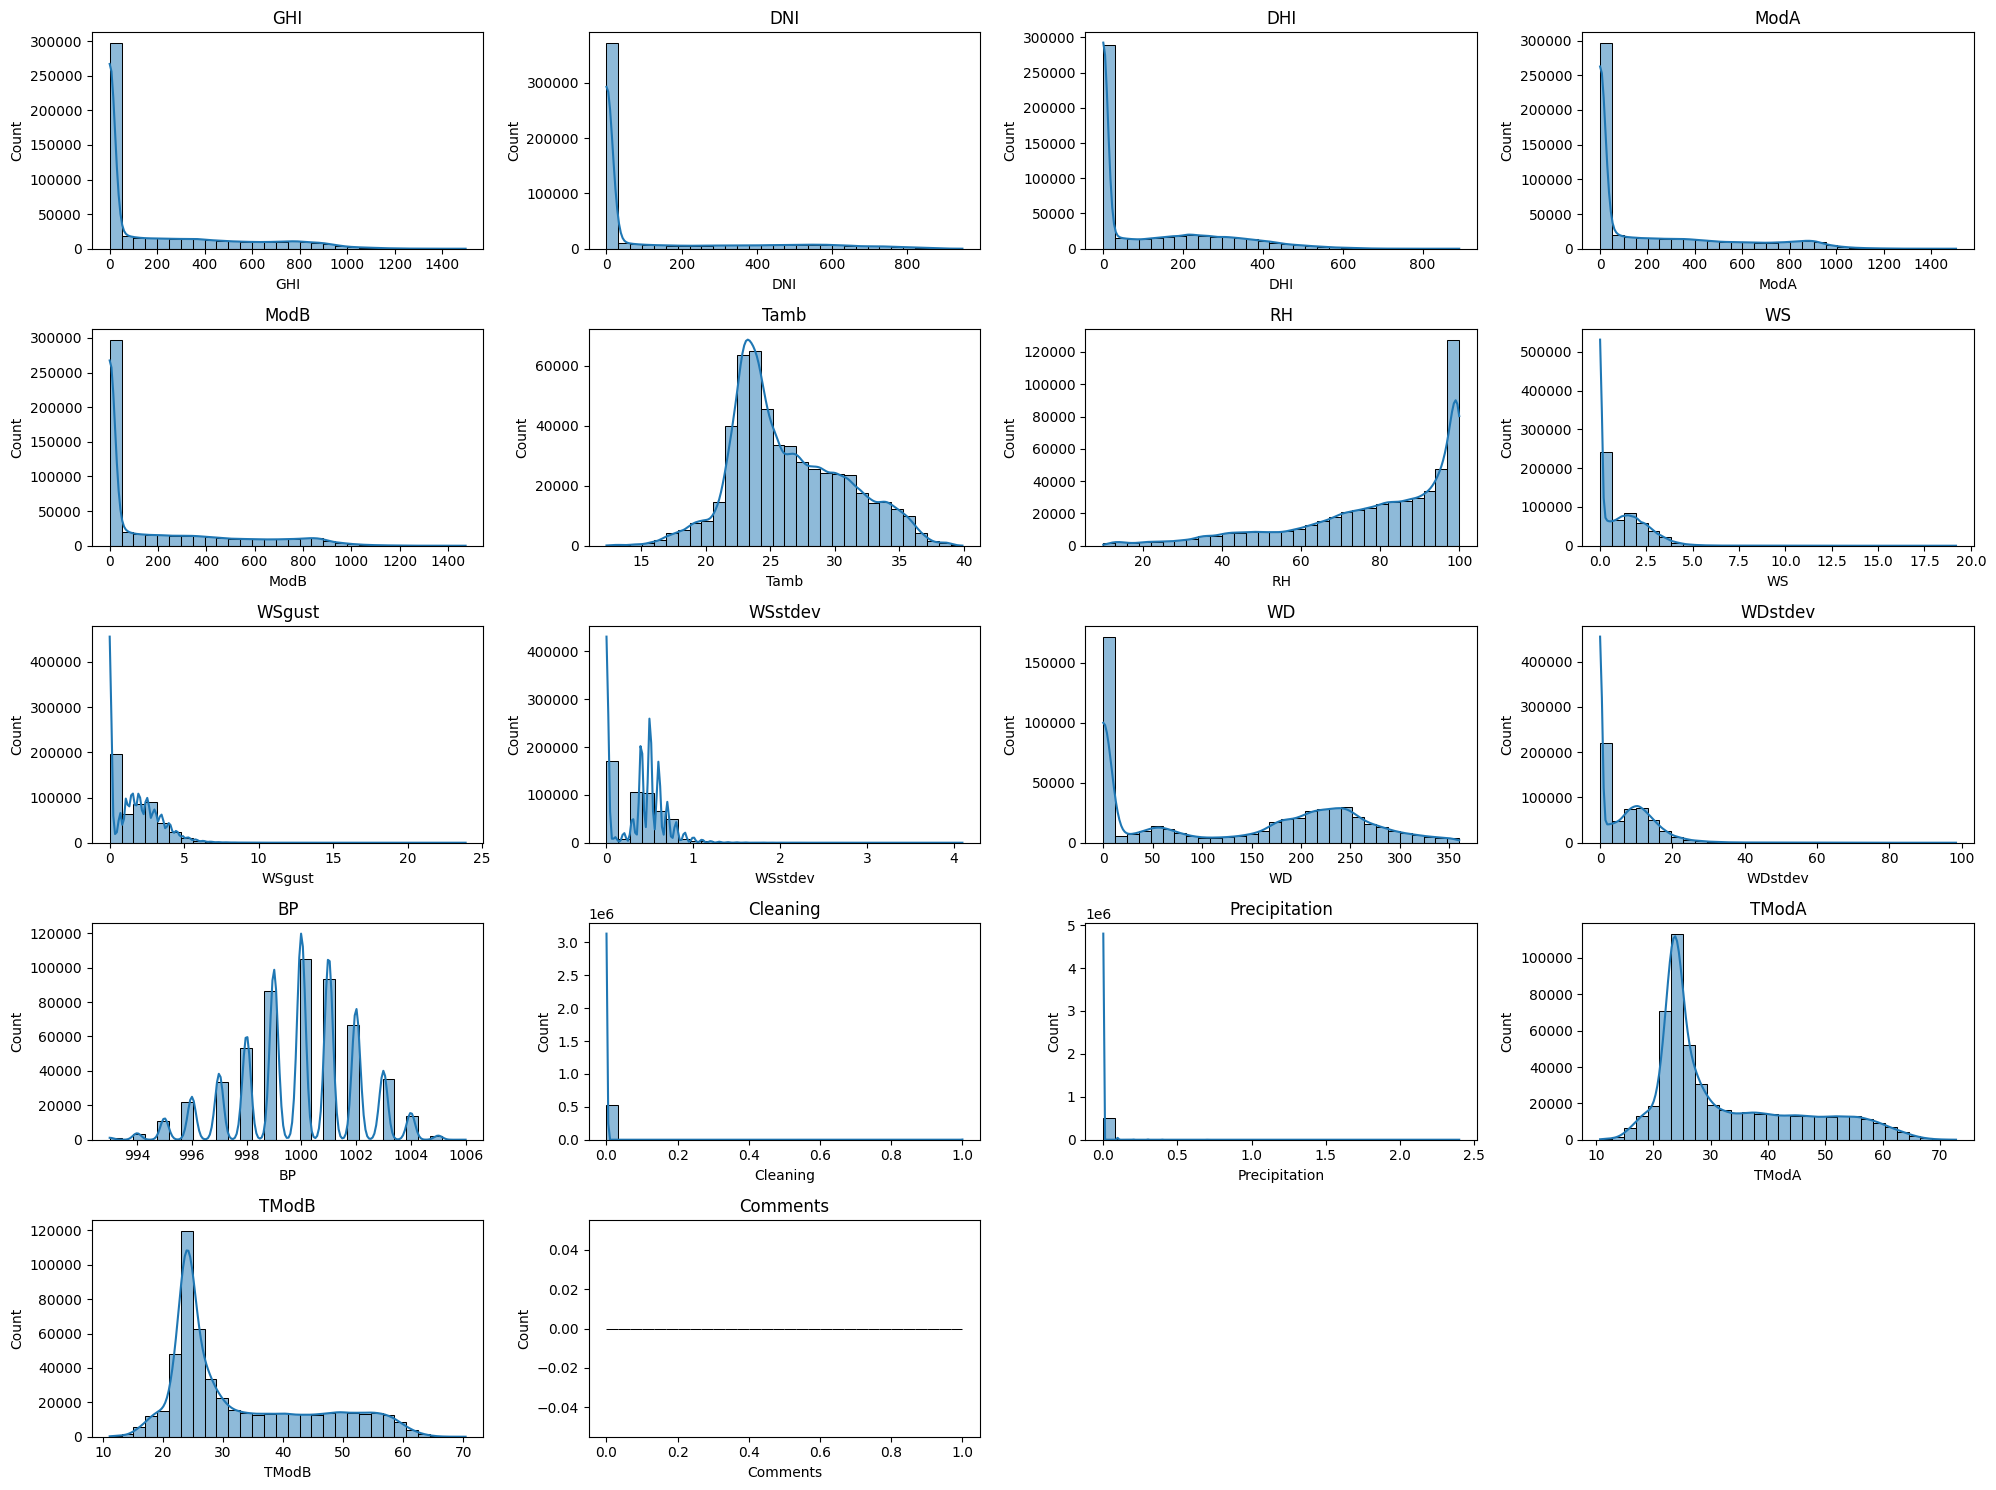

In [6]:
plot_numeric_histograms(df)

# Summary Stats & Nulls

In [7]:
df.describe()

Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-04-30 12:00:30.000000768     204.406778     116.523731   
min              2021-10-30 00:01:00       0.000000       0.000000   
25%              2022-01-29 06:00:45       0.000000       0.000000   
50%              2022-04-30 12:00:30       0.300000       0.000000   
75%              2022-07-30 18:00:15     362.400000     107.000000   
max              2022-10-30 00:00:00    1499.000000     946.000000   
std                              NaN     296.787520     218.573992   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      116.273677     206.643095     198.114691      26.319394   
min         0.000000       0.000000       0.000000      12.300000   
25%         0.000000       0.000000       0.000000      23.100000   
50%         0.000000       3.600000       3.400000      25.300000   
75%       224.700000     359.500000     345.400000      29.400000   
max       892.000000    1507.000000    1473.000000      39.900000   
std       157.020868     300.896893     288.889073       4.398605   

                  RH             WS         WSgust        WSstdev  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean       79.448857       1.146113       1.691606       0.363823   
min         9.900000       0.000000       0.000000       0.000000   
25%        68.700000       0.000000       0.000000       0.000000   
50%        85.400000       0.800000       1.600000       0.400000   
75%        96.700000       2.000000       2.600000       0.600000   
max       100.000000      19.200000      23.900000       4.100000   
std        20.520775       1.239248       1.617053       0.295000   

                  WD        WDstdev             BP       Cleaning  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      133.044668       7.172220     999.876469       0.000967   
min         0.000000       0.000000     993.000000       0.000000   
25%         0.000000       0.000000     999.000000       0.000000   
50%       161.500000       6.200000    1000.000000       0.000000   
75%       234.100000      12.000000    1001.000000       0.000000   
max       360.000000      98.400000    1006.000000       1.000000   
std       114.284792       7.535093       2.104419       0.031074   

       Precipitation          TModA          TModB  Comments  
count  525600.000000  525600.000000  525600.000000       0.0  
mean        0.004806      32.504263      32.593091       NaN  
min         0.000000      10.700000      11.100000       NaN  
25%         0.000000      23.500000      23.800000       NaN  
50%         0.000000      26.600000      26.900000       NaN  
75%         0.000000      40.900000      41.300000       NaN  
max         2.400000      72.800000      70.400000       NaN  
std         0.047556      12.434899      12.009161       NaN

In [8]:
df.isna().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [9]:
(df.isna().mean() * 100).sort_values(ascending=False)

Comments         100.0
WSstdev            0.0
TModB              0.0
TModA              0.0
Precipitation      0.0
Cleaning           0.0
BP                 0.0
WDstdev            0.0
WD                 0.0
Timestamp          0.0
GHI                0.0
WS                 0.0
RH                 0.0
Tamb               0.0
ModB               0.0
ModA               0.0
DHI                0.0
DNI                0.0
WSgust             0.0
dtype: float64

### Drop the `Comments` column

In [10]:
df.drop(columns=['Comments'], inplace=True)

# Outlier Detection

In [11]:
cols_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = df[cols_to_check].apply(zscore)

outliers = (z_scores.abs() > 3).sum()
outliers

GHI       2574
DNI       7594
DHI       3202
ModA      1604
ModB      2041
WS        3967
WSgust    3665
dtype: int64

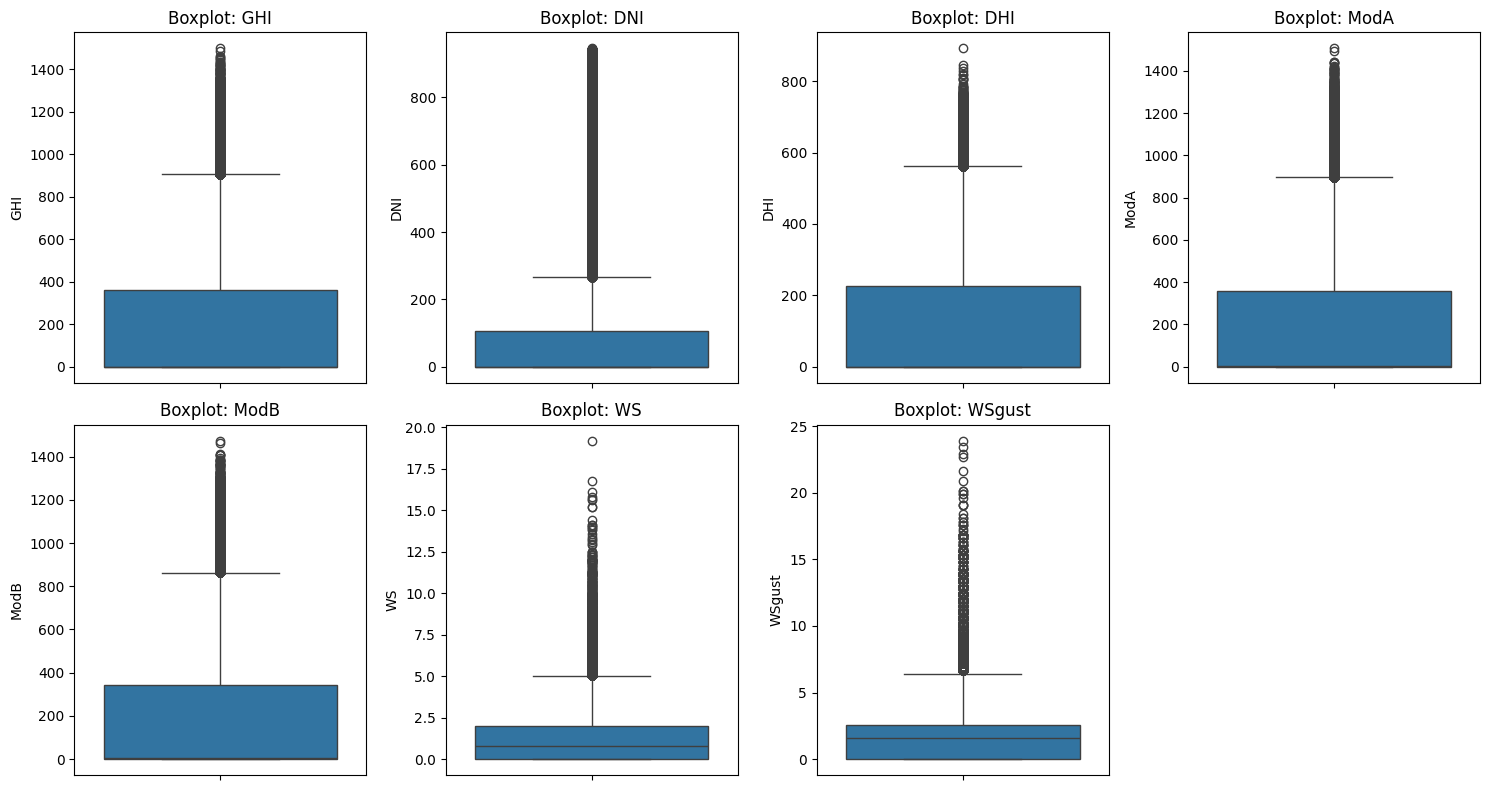

In [12]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(cols_to_check, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot: {col}')
    plt.tight_layout()

# Clean Data

In [14]:
df_clean = df.copy()
df_clean[cols_to_check] = df_clean[cols_to_check].fillna(df_clean[cols_to_check].median())
df_clean.to_csv('sierraleone_clean.csv', index=False)

# Time Series Charts

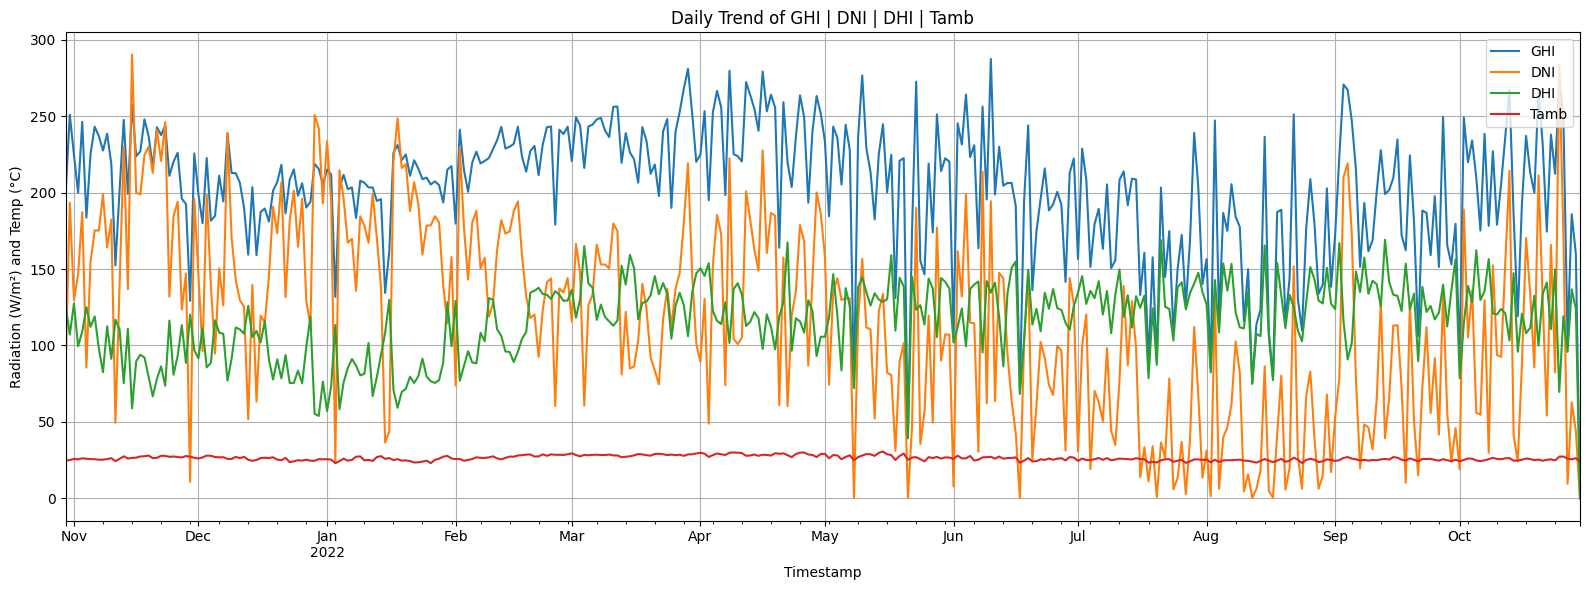

/home/samrawit/KAIM - 10 academy/week 0/solar-radiation-data-insights/scripts/plot.py:72: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  resampled = df[cols].resample(freq).mean()


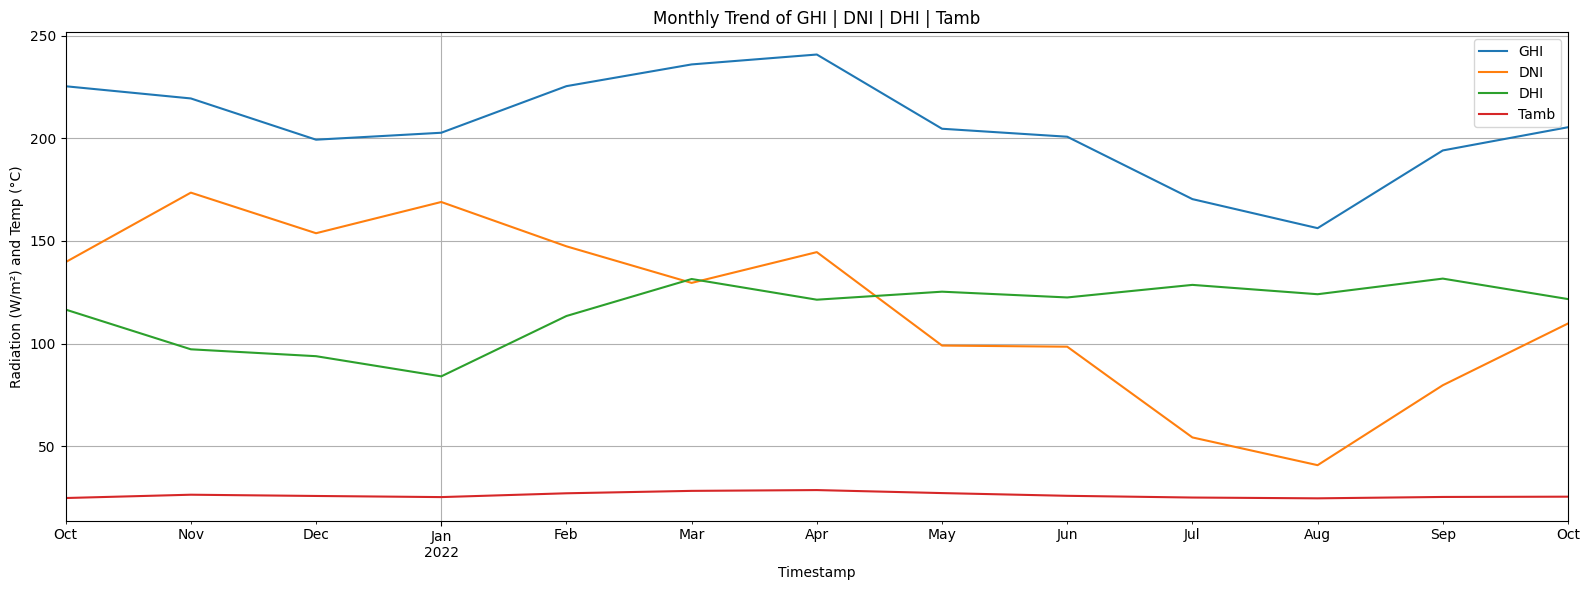

In [15]:

plot_time_series(
    df=df_clean,
    cols=['GHI', 'DNI', 'DHI', 'Tamb'],
    timestamp_col='Timestamp',
    y_label='Radiation (W/m²) and Temp (°C)',
    freq_title_map={
        'D': 'Daily',
        'M': 'Monthly'
    },
    freqs=['D', 'M'],
    figsize=(16, 6)
)

In [18]:
# df_clean.set_index('Timestamp')[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(12, 6))
# plt.title('Irradiance and Temperature over Time')
# plt.show()

# Cleaning Impact

Text(0.5, 1.0, 'Effect of Cleaning on Mod\\A and ModB')

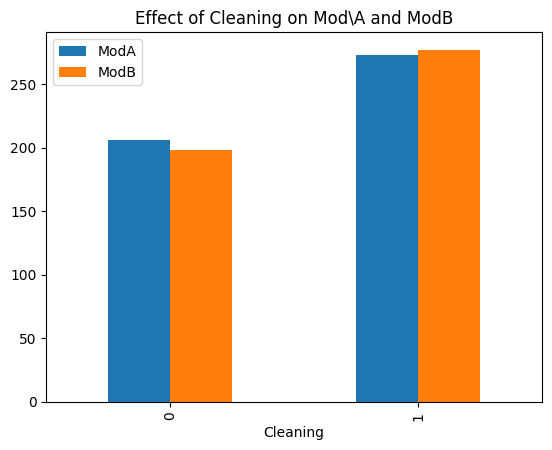

In [16]:
df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar')
plt.title('Effect of Cleaning on Mod\A and ModB')
# plt.show().groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar')

# Correlation & Scatter Plots

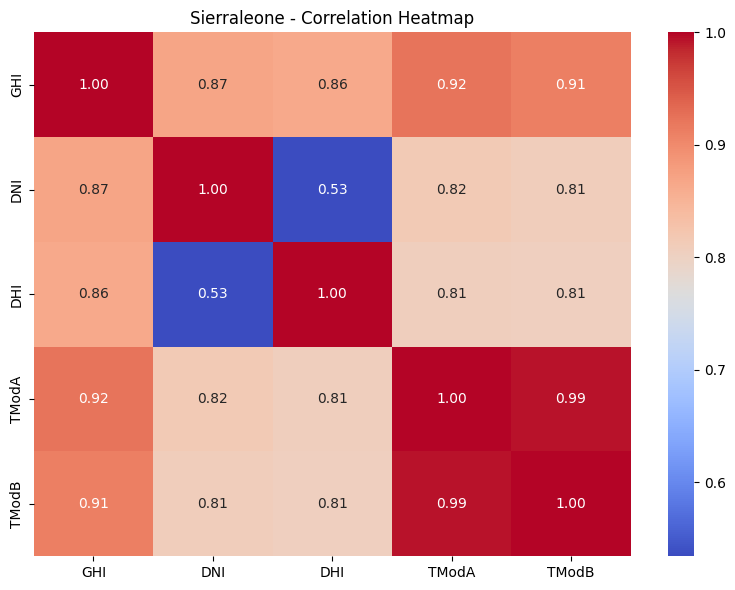

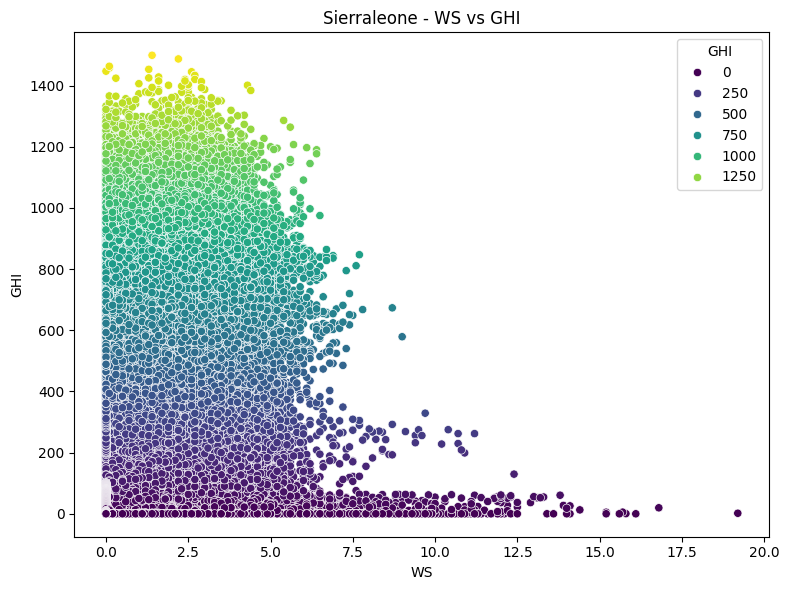

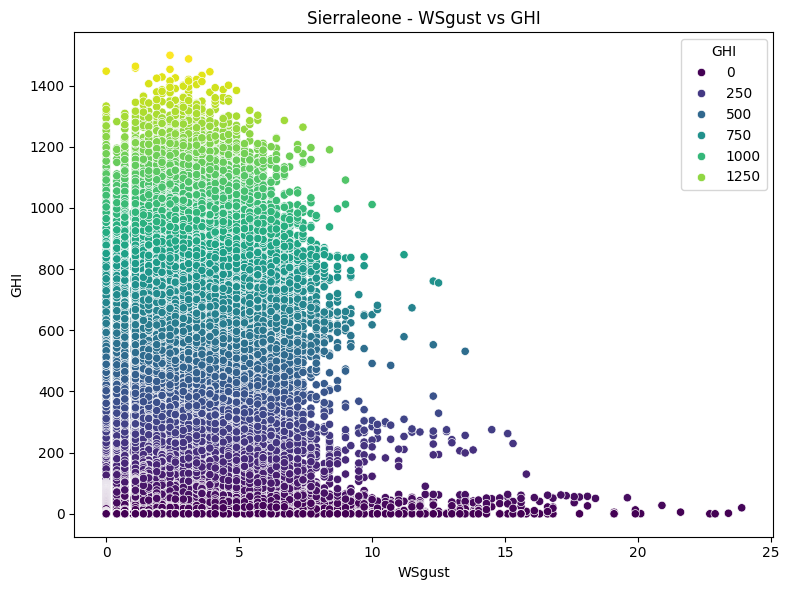

/home/samrawit/KAIM - 10 academy/week 0/solar-radiation-data-insights/scripts/plot.py:103: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/samrawit/anaconda3/envs/mltraining/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


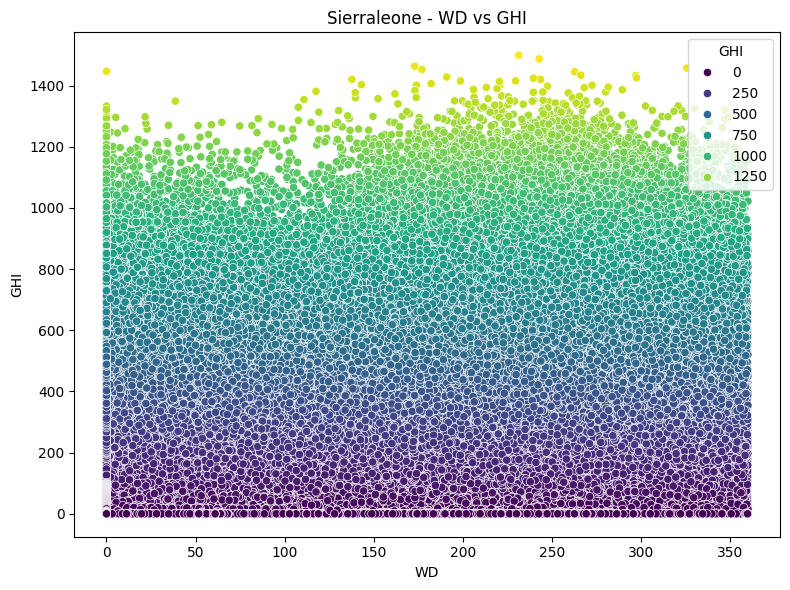

In [17]:
# Define parameters
heatmap_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
scatter_x_vars = ['WS', 'WSgust', 'WD']

# For Sierraleone
plot_correlation_heatmap(df_clean, heatmap_columns, region_name='Sierraleone')
plot_scatter_plots(df_clean, scatter_x_vars, region_name='Sierraleone')

# Wind + Histograms

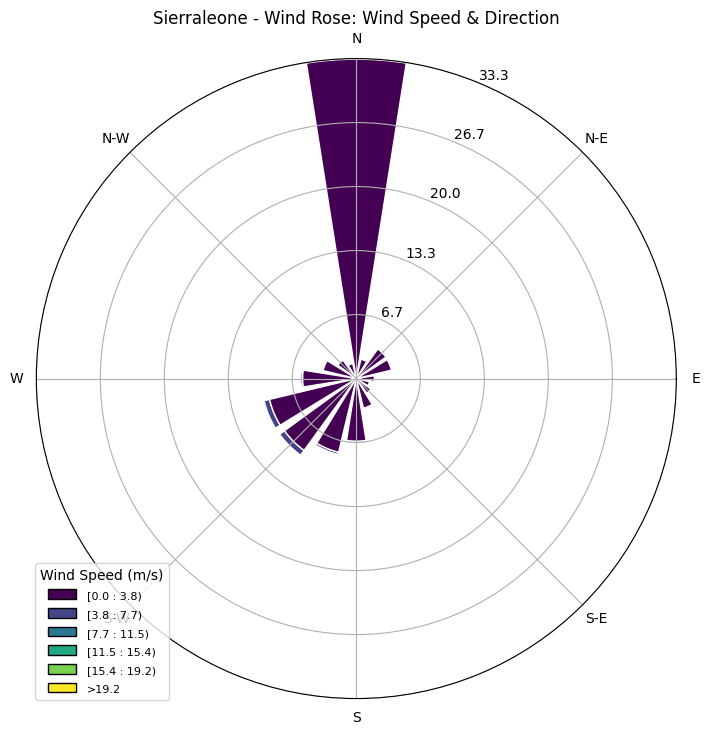

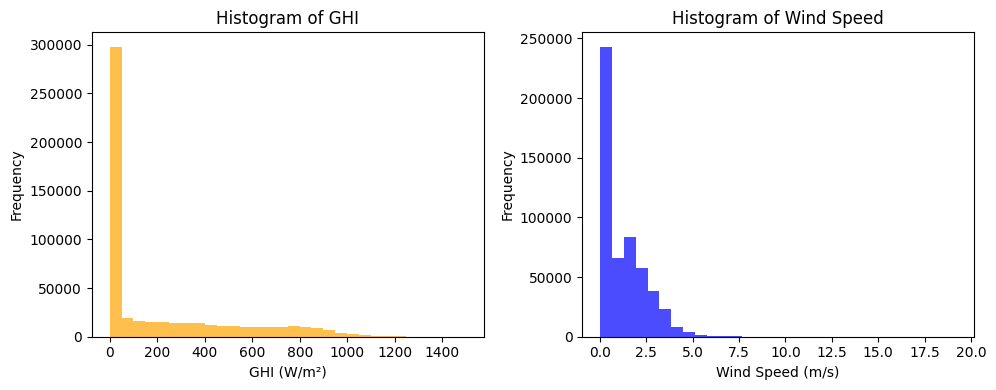

In [18]:
plot_wind_analysis(df_clean, region_name="Sierraleone")

# Temperature vs RH

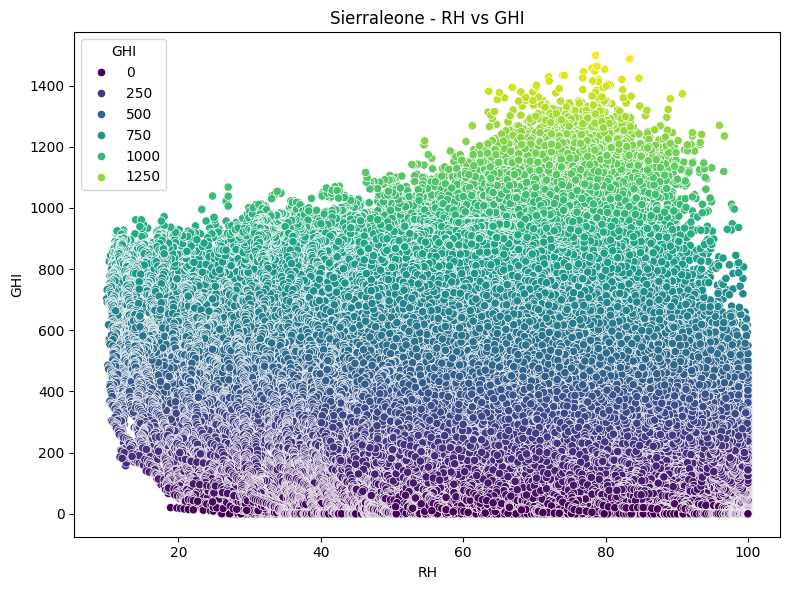

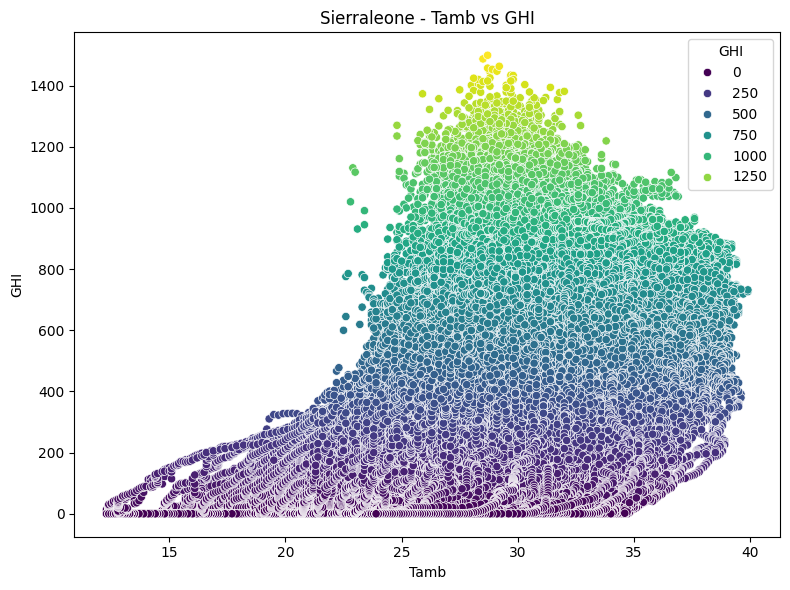

Pearson correlation between Tamb and RH: -0.792 (p=0.000e+00)
Spearman correlation between GHI and RH: -0.551 (p=0.000e+00)


In [19]:
plot_scatter_plots(df, x_columns=['RH', 'Tamb'], y_column='GHI', region_name='Sierraleone')

# Calculate Pearson correlation
pearson_temp_rh = calculate_pearson(df, 'Tamb', 'RH')

# Calculate Spearman correlation
spearman_ghi_rh = calculate_spearman(df, 'GHI', 'RH')

# Bubble Chart

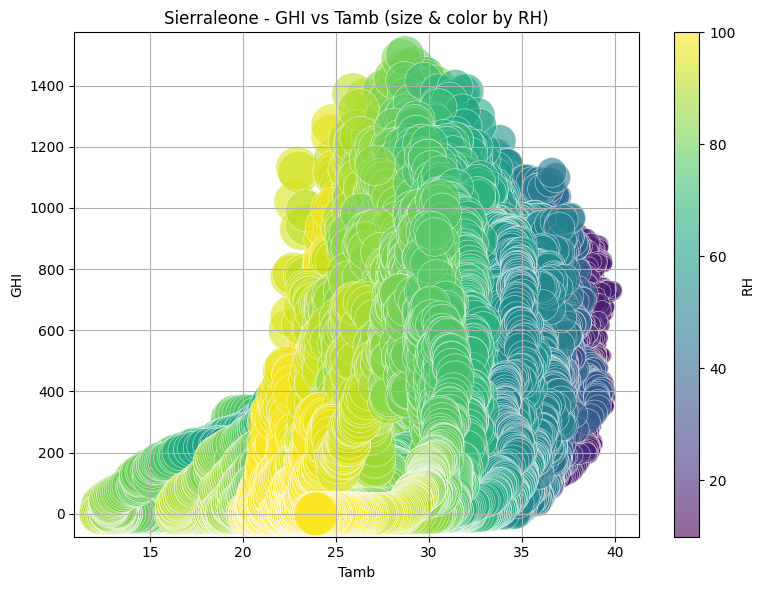

In [20]:
plot_bubble_chart(df, x_col='Tamb', y_col='GHI', size_col='RH', region_name='Sierraleone')